In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model


model = load_model('best_model.h5')

emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

cap.set(3, 640) 
cap.set(4, 480)  



print("Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.flip(frame, 1)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray.astype('float32') / 255.0
        roi_gray = np.expand_dims(roi_gray, axis=0)
        roi_gray = np.expand_dims(roi_gray, axis=-1)

        prediction = model.predict(roi_gray, verbose=0)
        emotion = emotion_labels[np.argmax(prediction)]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
        cv2.putText(frame, emotion, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 2)


    cv2.imshow('Real-Time Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


Press 'q' to quit.


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model('best_model.h5')
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

img = image.load_img("smile.webp", color_mode = 'grayscale', target_size = (48, 48))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 48, 48, 1)


prediction = model.predict(img_array)
predicted_emotion = emotion_labels[np.argmax(prediction)]

predicted_emotion

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


'happy'

In [3]:
import matplotlib.pyplot as plt

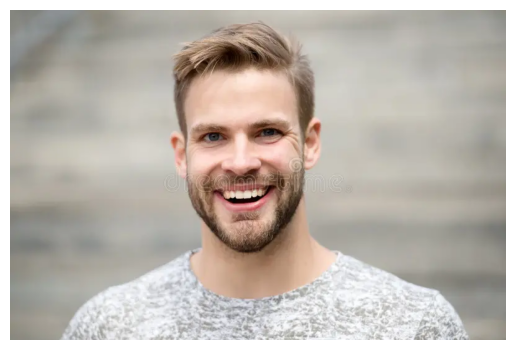

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('smile.webp')
plt.imshow(img)
plt.axis('off')
plt.show()